# program

In [1]:
# import library
import pandas as pd

df = pd.read_csv('/content/tangkap_sensor_1_adc.csv')

In [2]:
df = df.drop(['id', 'waktu'], axis=1)

In [3]:
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler().fit_transform(df)

In [4]:
minmax

array([[2.93040293e-03, 8.69205298e-03, 7.32600733e-04, 8.58012732e-03,
        0.00000000e+00, 7.84412955e-03],
       [2.93040293e-03, 8.69205298e-03, 7.32600733e-04, 8.58012732e-03,
        0.00000000e+00, 7.84412955e-03],
       [2.93040293e-03, 8.69205298e-03, 7.32600733e-04, 8.58012732e-03,
        0.00000000e+00, 7.84412955e-03],
       ...,
       [6.60317460e-01, 0.00000000e+00, 6.99145299e-01, 9.83393302e-01,
        4.79074348e-01, 3.40840081e-01],
       [6.60317460e-01, 0.00000000e+00, 6.99145299e-01, 9.82839745e-01,
        4.80797637e-01, 3.40587045e-01],
       [6.59829060e-01, 0.00000000e+00, 6.99145299e-01, 9.82009410e-01,
        4.83259478e-01, 3.42358300e-01]])

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [6]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [7]:
df['cluster'] = kmeans.labels_

In [8]:
df

,sensor1_adc,sensor2_adc,sensor3_adc,sensor4_adc,sensor5_adc,sensor6_adc,cluster
0,12,21,3,31,33,31,1
1,12,21,3,31,33,31,1
2,12,21,3,31,33,31,1
3,0,0,0,0,630,342,1
4,0,0,0,0,355,118,1
...,...,...,...,...,...,...,...
26635,2704,0,2864,3551,1963,1347,0
26636,2704,0,2864,3554,1968,1328,0
26637,2704,0,2863,3553,1979,1347,0
26638,2704,0,2863,3551,1986,1346,0


(array([26555.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    85.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

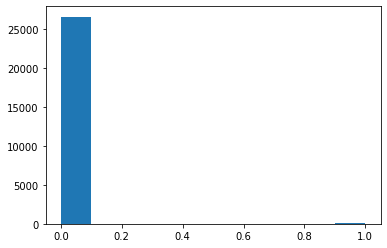

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['cluster'])

In [10]:
df['cluster'].value_counts()

0    26555
1       85
Name: cluster, dtype: int64

# save model pkl

In [48]:
import pickle

# Save the model under the cwd
with open("industry.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [49]:
# Load the saved model
with open("industry.pkl", "rb") as f:
    industry = pickle.load(f)

In [58]:
print(industry.predict([[0, 0, 0, 0, 272, 0]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
